<a href="https://colab.research.google.com/github/CameronChadwick/data_analysis/blob/main/least_squares_revisit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
from matplotlib import pyplot as plt

# Linear Regression

In [17]:
x = [1, 2, 4, 6, 5, 6, 9, 8, 11, 12]
y = [14, 10, 12, 9, 8, 6, 4, 3, 3, 10]

def linear_regression(x, y):
  x_sum = 0
  x_squ = 0
  y_sum = 0 
  xy_sum = 0
  points = len(x)

  for n in range(len(x)):
    xy_sum += x[n] * y[n]
    x_sum += x[n]
    x_squ += x[n] * x[n]
    y_sum += y[n]

  matrix1 = [[x_squ, x_sum], [x_sum, points]]
  matrix2 = [xy_sum, y_sum]
  invmat1 = np.linalg.inv(matrix1)
  result = np.dot(matrix2, invmat1)
  return result

linear_regression(x, y)

array([-0.68074324, 12.25675676])

# Residuals

In [18]:
def resids(x_list, y_list, slope, yint):
  resid_list = []
  y_line = []
  y = 0
  
  for index in range(len(x_list)):
    y = y_list[index] - (slope * x_list[index] + yint)
    resid_list.append(y)
  return resid_list

def mean(data):
  added = 0
  for value in data:
    added += value
  divide = len(data)
  mean = added / divide
  return mean

def variance(data):
  sub = mean(data)
  list2 = []
  for value in data:
    subtract = value - sub 
    values = subtract ** 2
    list2.append(values)
  list_sum = sum(list2)
  variance = list_sum / len(data)
  return variance
  

def stand_dev(data):
  standard = variance(data) ** 0.5
  return standard

residuals = resids(x, y, linear_regression(x, y)[0], linear_regression(x, y)[1])
resid_mean = mean(residuals)
resid_dev = stand_dev(residuals)
print(residuals)
print(resid_mean)
print(resid_dev)

[2.423986486486486, -0.8952702702702702, 2.4662162162162176, 0.8277027027027053, -0.8530405405405386, -2.1722972972972947, -2.130067567567563, -3.810810810810807, -1.7685810810810754, 5.9121621621621685]
2.842170943040401e-15
2.7573917856299386


In [19]:
def redlines(mean, stddev, n, main_yint):
  top_line = mean + (n * stddev)
  bottom_line = mean - (n * stddev)
  top_int = main_yint + top_line
  bottom_int = main_yint + bottom_line
  return bottom_int, top_int

redlines(resid_mean, resid_dev, 2, linear_regression(x, y)[1])

(6.741973185496883, 17.771540328016638)

# Plot

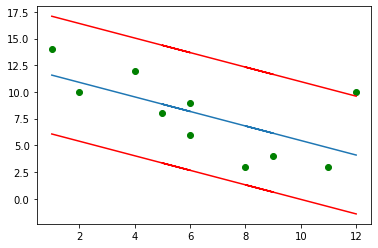

In [20]:
slope = linear_regression(x, y)[0]
y_int = linear_regression(x, y)[1]
upper_y_int = redlines(resid_mean, resid_dev, 2, linear_regression(x, y)[1])[1]
lower_y_int = redlines(resid_mean, resid_dev, 2, linear_regression(x, y)[1])[0]

def lines_plot(x, y, slope, y_int, u_y_int, l_y_int):
  y_coords = [x_coord * slope + y_int for x_coord in x]
  upper_y_coords = [x_coord * slope + u_y_int for x_coord in x]
  lower_y_coords = [x_coord * slope + l_y_int for x_coord in x]
  plt.scatter(x, y, c='green')
  plt.plot(x, y_coords)
  plt.plot(x, upper_y_coords, c='red')
  plt.plot(x, lower_y_coords, c='red')

lines_plot(x, y, slope, y_int, upper_y_int, lower_y_int)

# Removing Outlier

In [21]:
def remove(x_list, y_list, upper_y):
  for index in range(len(y_list)):
    if y_list[index] > (slope * x_list[index] + upper_y):
      y_list.pop(index)
      x_list.pop(index)
  return x_list, y_list

remove(x, y, upper_y_int)

([1, 2, 4, 6, 5, 6, 9, 8, 11], [14, 10, 12, 9, 8, 6, 4, 3, 3])

# Run The New List

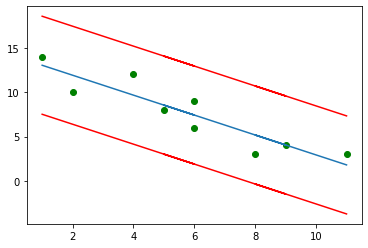

In [22]:
slope_n = linear_regression(x, y)[0]
y_int_n = linear_regression(x, y)[1]
upper_y_int_n = redlines(resid_mean, resid_dev, 2, linear_regression(x, y)[1])[1]
lower_y_int_n = redlines(resid_mean, resid_dev, 2, linear_regression(x, y)[1])[0]

lines_plot(x, y, slope_n, y_int_n, upper_y_int_n, lower_y_int_n)